<a href="https://colab.research.google.com/github/karnol15/cse360_inclass/blob/main/MAT_422_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# Will import the relevant packages

import kagglehub # get the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

import zipfile
import os


In [28]:
# import data

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

# now just get the dataset
for file in os.listdir(path):
    if file.endswith('.csv'):  # Look for a CSV file
        PIDD_file = os.path.join(path, file)
        break

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(PIDD_file)

# Display the first few rows
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# adjust the code for cleaning. if glucose, blood press, skin thickness, insulin, BMI, pedigree fn or age is 0, make it N/A

columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Replace 0 with NaN in the specified columns
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

# Verify the changes
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


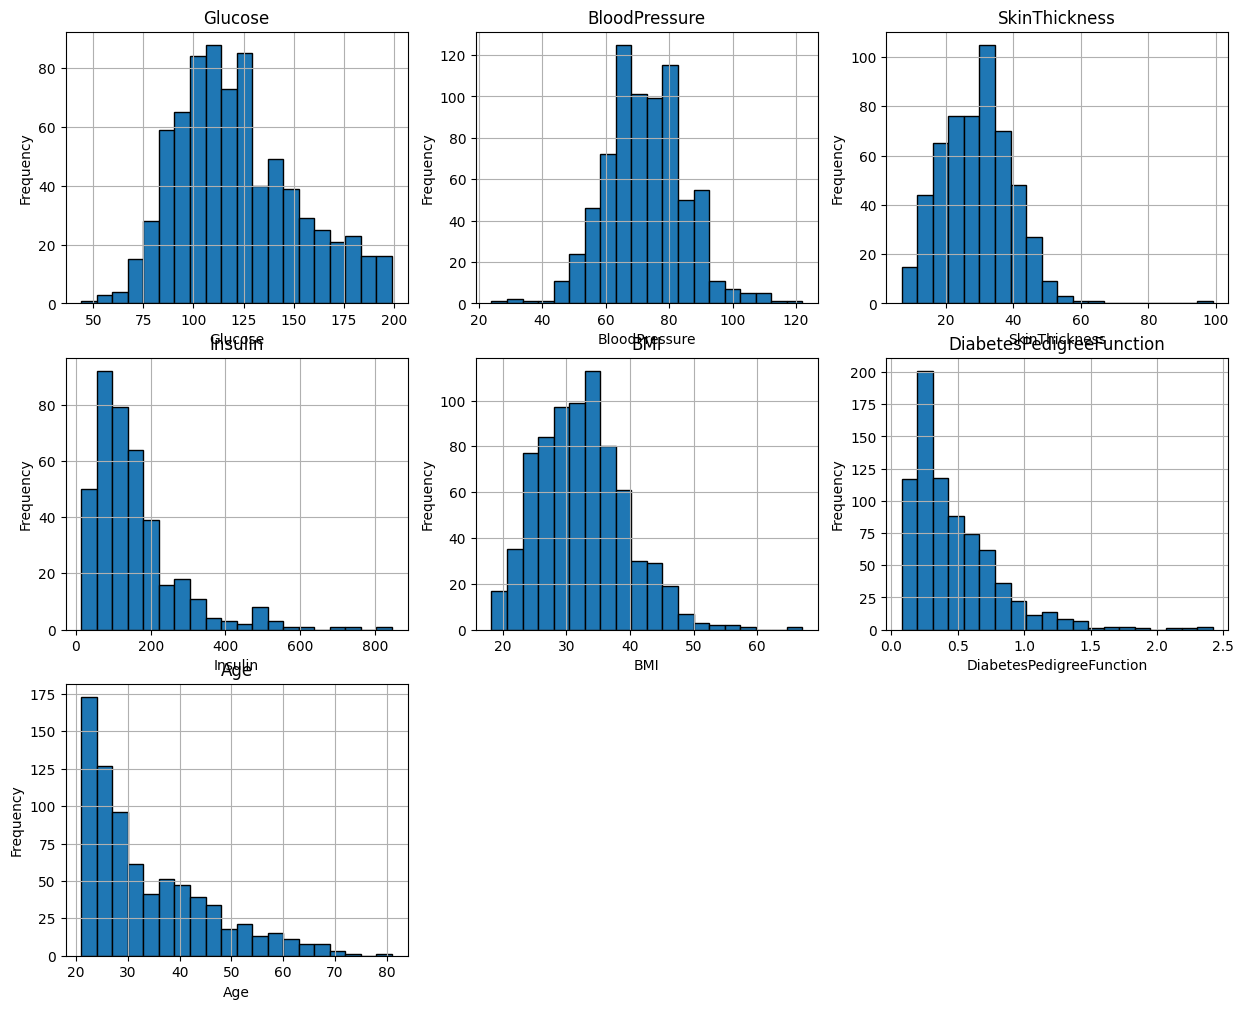

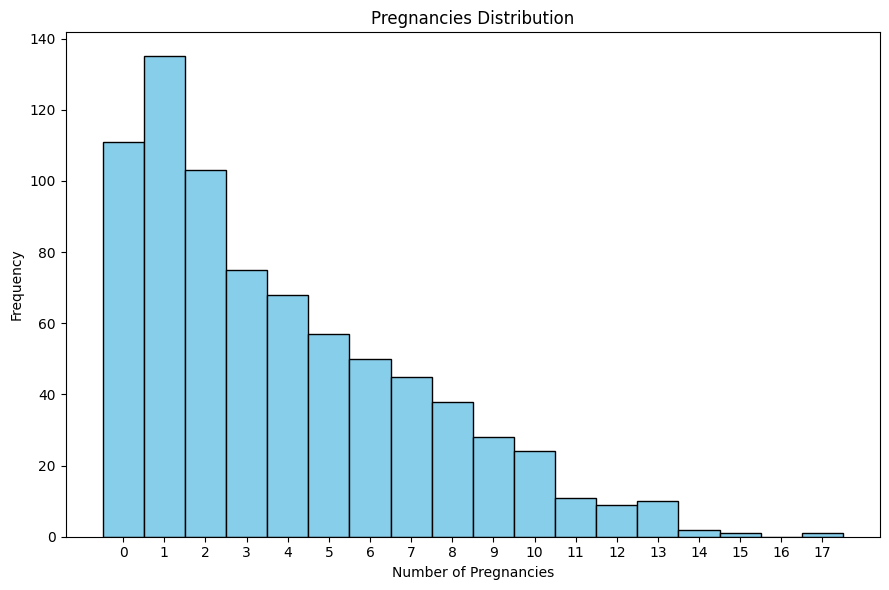

In [30]:
# create a separate bar chart for outcome
outcome_counts = df['Outcome'].value_counts()

# Plot histograms for other columns
num_columns = len(df.columns) - 1  # Exclude Outcome
rows = (num_columns + 2) // 3  # Number of rows for subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each column except Outcome
columns_to_plot = [col for col in df.columns if col != 'Outcome' and col != 'Pregnancies']

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    df[column].dropna().hist(ax=ax, bins=20, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Plot for the 'Pregnancies' column
plt.figure(figsize=(9, 6))
plt.hist(df['Pregnancies'], bins=np.arange(df['Pregnancies'].min(), df['Pregnancies'].max() + 2) - 0.5, color='skyblue', edgecolor='black')
plt.title('Pregnancies Distribution')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')

# Set integer ticks for x-axis
plt.xticks(np.arange(df['Pregnancies'].min(), df['Pregnancies'].max() + 1))


# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



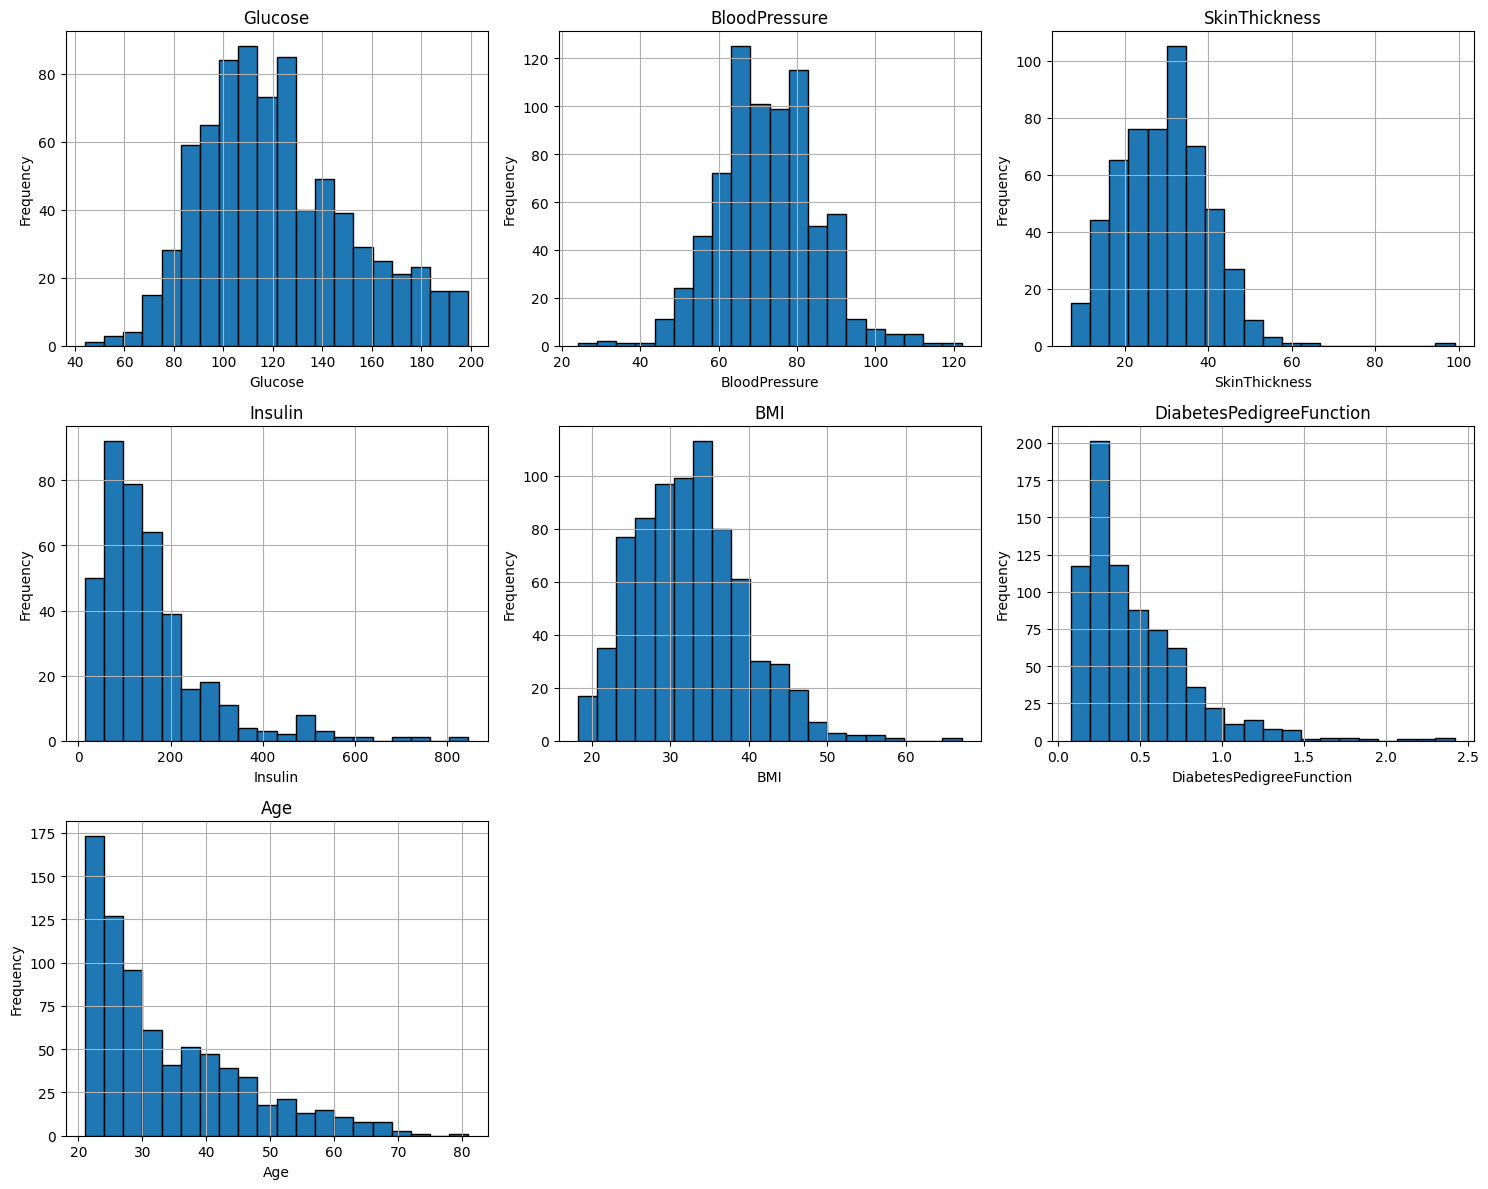

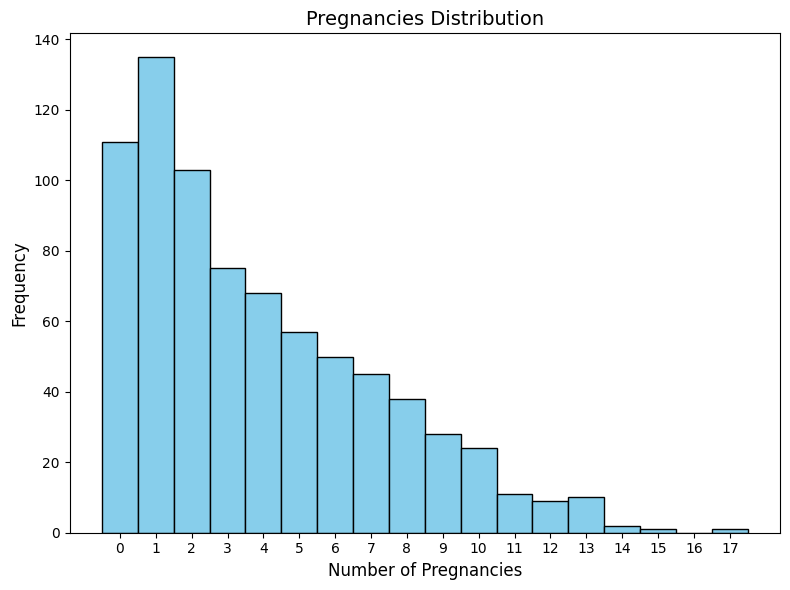

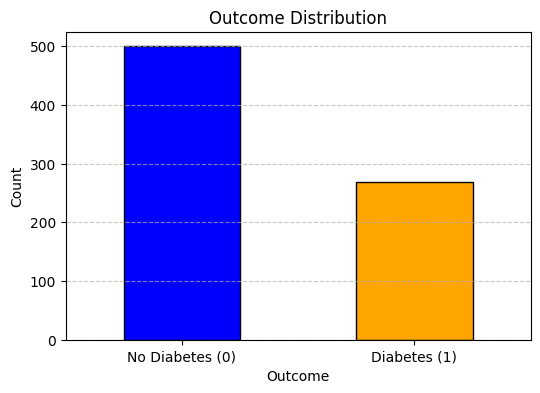

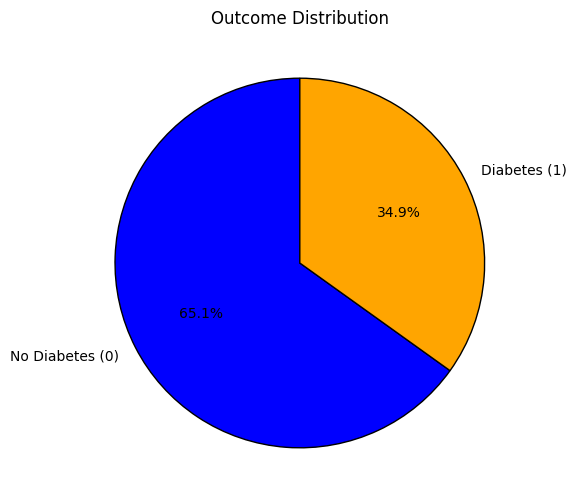

In [31]:
# Exclude Outcome and Pregnancies from histogram plotting
columns_to_plot = [col for col in df.columns if col not in ['Outcome', 'Pregnancies']]

# Plot histograms for other columns
num_columns = len(columns_to_plot)  # Number of columns to plot
rows = (num_columns + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    df[column].dropna().hist(ax=ax, bins=20, edgecolor='black')
    ax.set_title(column, fontsize=12)
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

# Remove empty axes if there are any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Apply tight layout
plt.tight_layout()
plt.show()

# Plot for the 'Pregnancies' column separately
plt.figure(figsize=(8, 6))
plt.hist(df['Pregnancies'], bins=np.arange(df['Pregnancies'].min(), df['Pregnancies'].max() + 2) - 0.5, color='skyblue', edgecolor='black')
plt.title('Pregnancies Distribution', fontsize=14)
plt.xlabel('Number of Pregnancies', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Set integer ticks for x-axis
plt.xticks(np.arange(df['Pregnancies'].min(), df['Pregnancies'].max() + 1))
plt.tight_layout()
plt.show()

# Plot Outcome separately as a bar chart
plt.figure(figsize=(6, 4))
outcome_counts.plot(kind='bar', color=['blue', 'orange'], edgecolor='black')
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['No Diabetes (0)', 'Diabetes (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Plot the pie chart
plt.figure(figsize=(6, 6))
outcome_counts.plot.pie(
    labels=['No Diabetes (0)', 'Diabetes (1)'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['blue', 'orange'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Outcome Distribution')
plt.ylabel('')  # Remove default y-label for pie chart
plt.show()

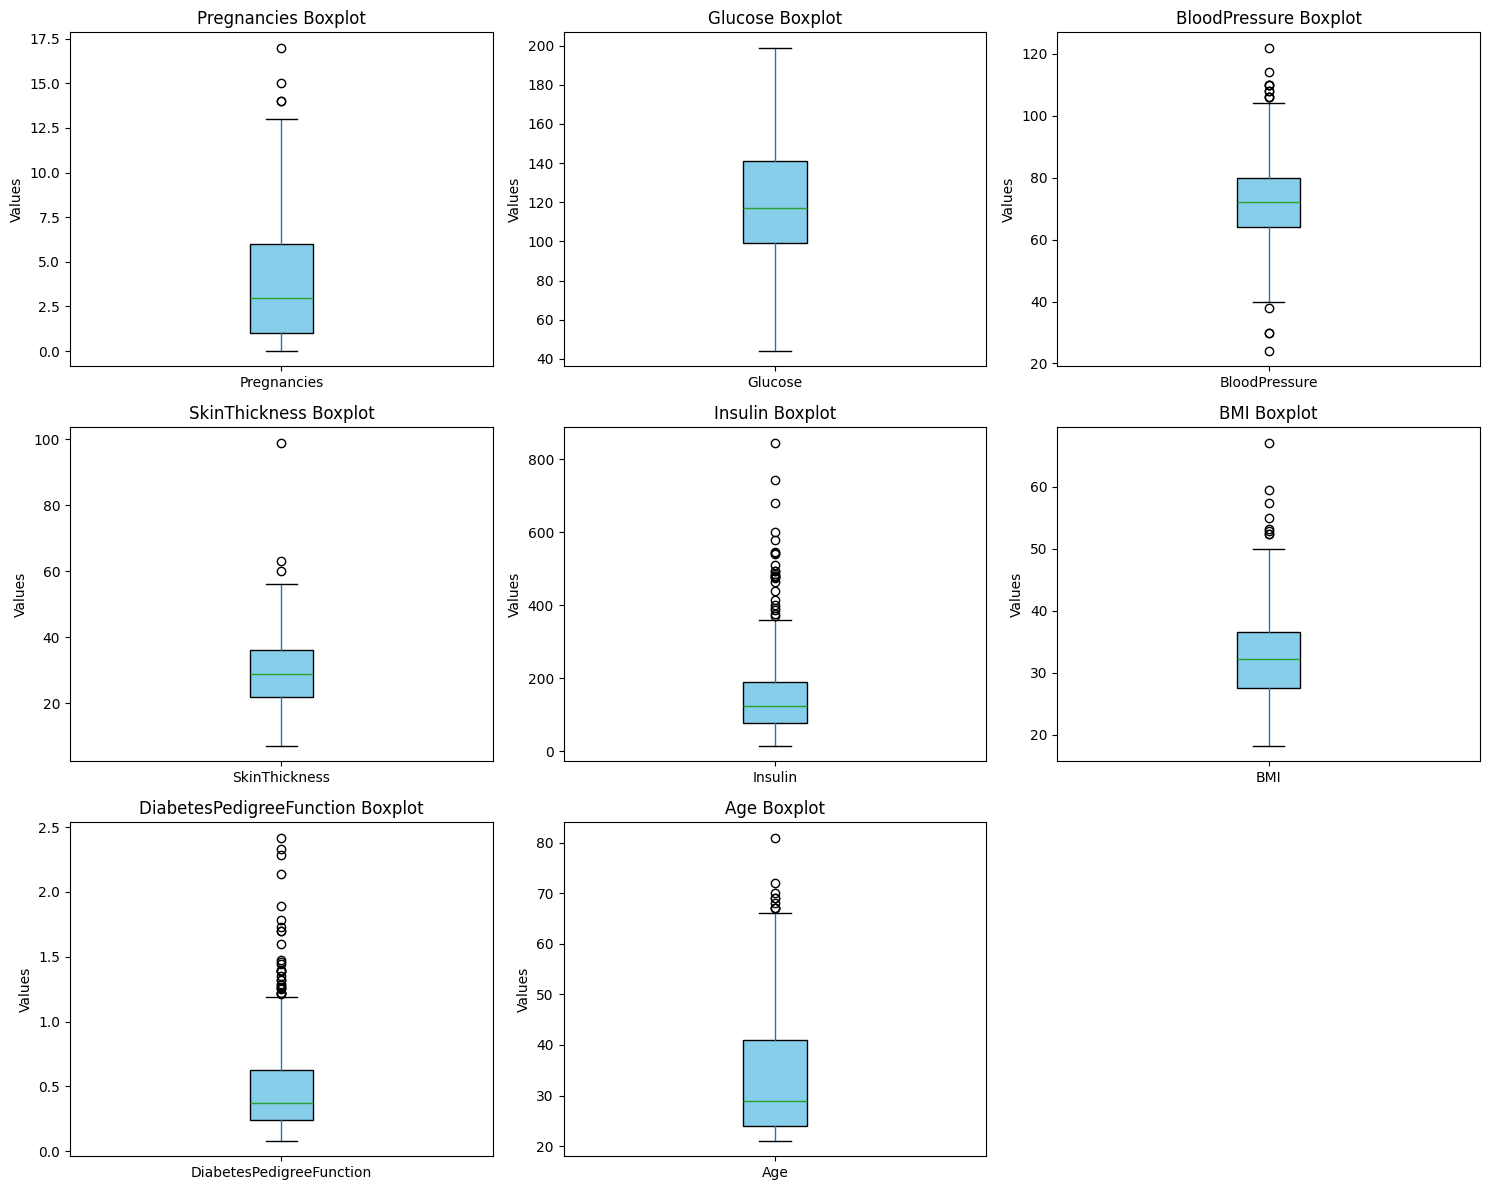

In [36]:
# will provide more visuals for understanding the data provided

# Columns to plot (excluding 'Outcome')
columns_to_plot = [col for col in df.columns if col != 'Outcome']

# Number of columns to plot
num_columns = len(columns_to_plot)
rows = (num_columns + 2) // 3  # Adjust rows for grid layout

# Create subplots for boxplots
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    df.boxplot(column=column, ax=ax, grid=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
    ax.set_title(f'{column} Boxplot')
    ax.set_ylabel('Values')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Will split the data using 80/20



In [41]:
# use above imported library to split data

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Outcome'])

# Preprocess the Data#

Will now begin to preprocess the data to create the logistic regression model. Based off of the boxplots, will impute the missing values as follows:
* do mean for attributes without many outliers (only glucose),
* otherwise use median for attributes with outliers.

In [42]:
# will now preprocess the training set
train_df_processed = train_df.copy()

# Impute missing values in the training set
for column in train_df_processed.columns:
    if column != 'Glucose':
        train_df_processed[column] = train_df_processed[column].fillna(train_df_processed[column].median())  # Impute with median

train_df_processed['Glucose'] = train_df_processed['Glucose'].fillna(train_df_processed['Glucose'].mean())  # Impute 'Glucose' with mean


# with the TRAINING set, now preprocess the test set using the training sets parameters
test_df_processed = test_df.copy()

# Impute missing values in the test set using training set parameters
for column in test_df_processed.columns:
    if column != 'Glucose':
        test_df_processed[column] = test_df_processed[column].fillna(train_df_processed[column].median())  # Use training median

test_df_processed['Glucose'] = test_df_processed['Glucose'].fillna(train_df_processed['Glucose'].mean())  # Use training mean


Next will deal with outliers using IQR-based filtering. Will remove values outside 1.5x IQR from the IQR range.

In [43]:
for column in train_df_processed.columns:
    if column != 'Outcome':  # Skip the target column
        Q1 = train_df_processed[column].quantile(0.25)
        Q3 = train_df_processed[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        train_df_processed[column] = train_df_processed[column].clip(lower_bound, upper_bound)

for column in test_df_processed.columns:
    if column != 'Outcome':  # Skip the target column
        Q1 = train_df_processed[column].quantile(0.25)
        Q3 = train_df_processed[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        test_df_processed[column] = test_df_processed[column].clip(lower_bound, upper_bound)



Just to check, will reuse code from above for boxplots to see how outliers look like now

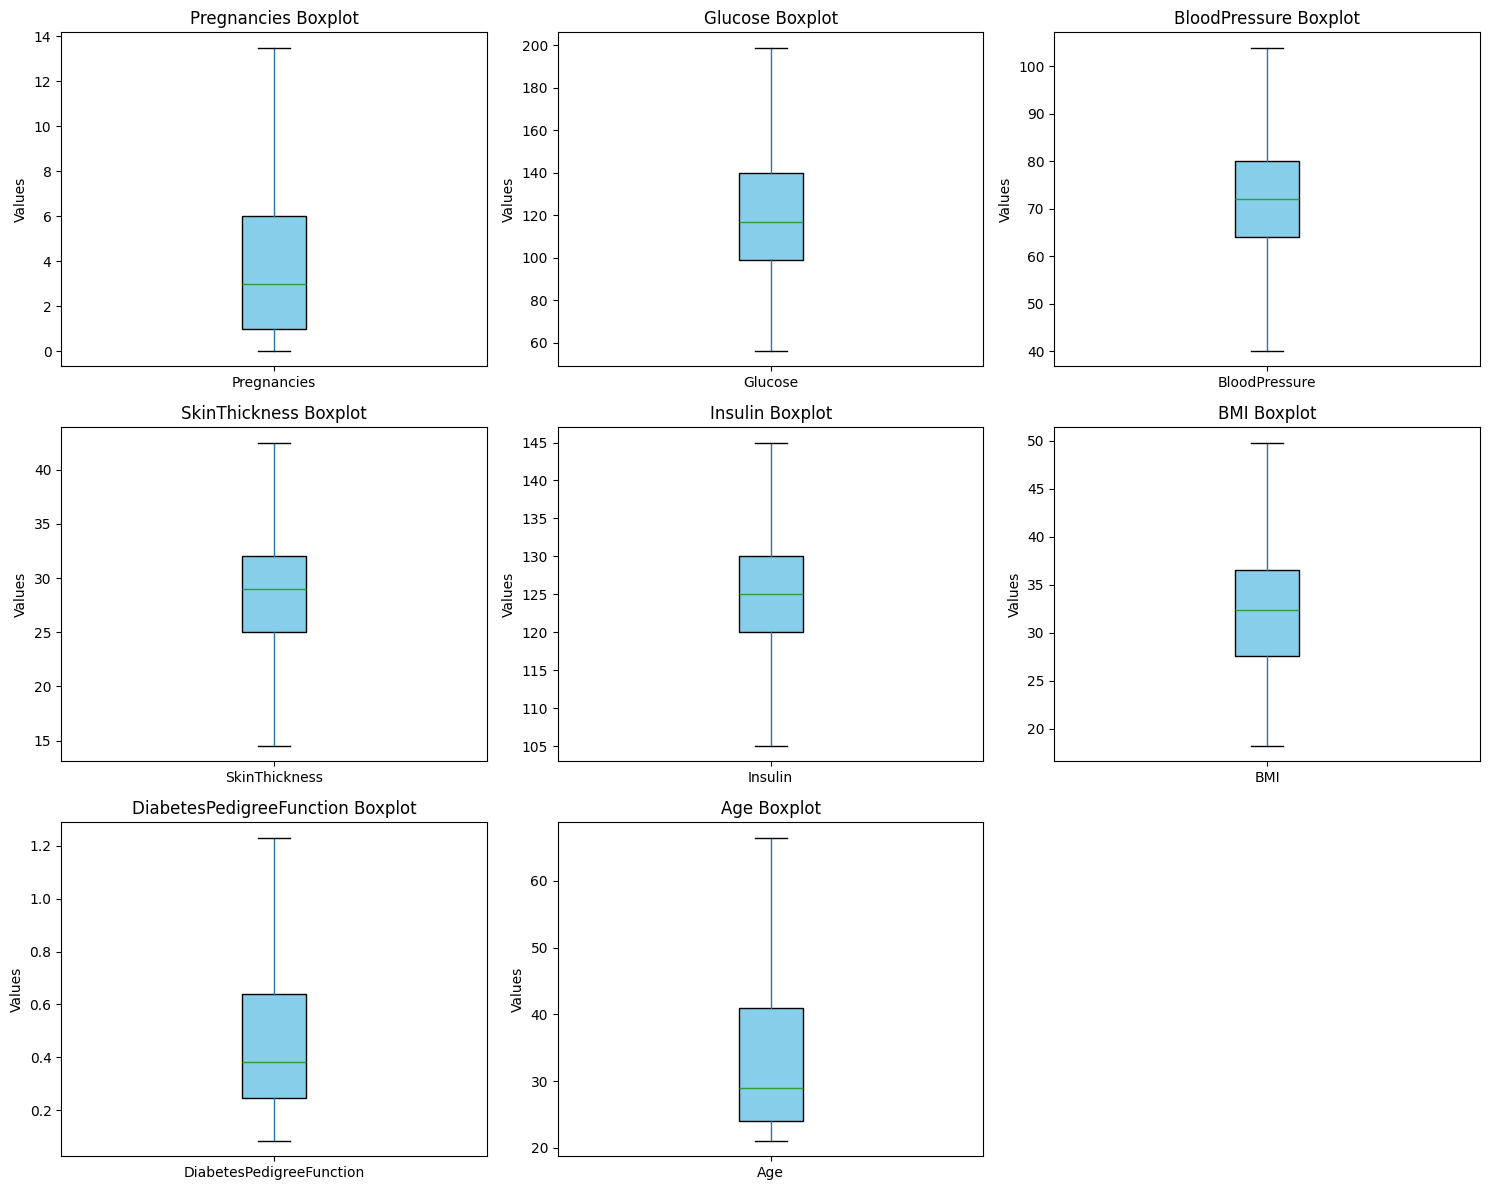

In [44]:
# will provide more visuals for understanding the data provided

# Columns to plot (excluding 'Outcome')
columns_to_plot = [col for col in train_df_processed.columns if col != 'Outcome']

# Number of columns to plot
num_columns = len(columns_to_plot)
rows = (num_columns + 2) // 3  # Adjust rows for grid layout

# Create subplots for boxplots
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    train_df_processed.boxplot(column=column, ax=ax, grid=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
    ax.set_title(f'{column} Boxplot')
    ax.set_ylabel('Values')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


check for multicollinearity


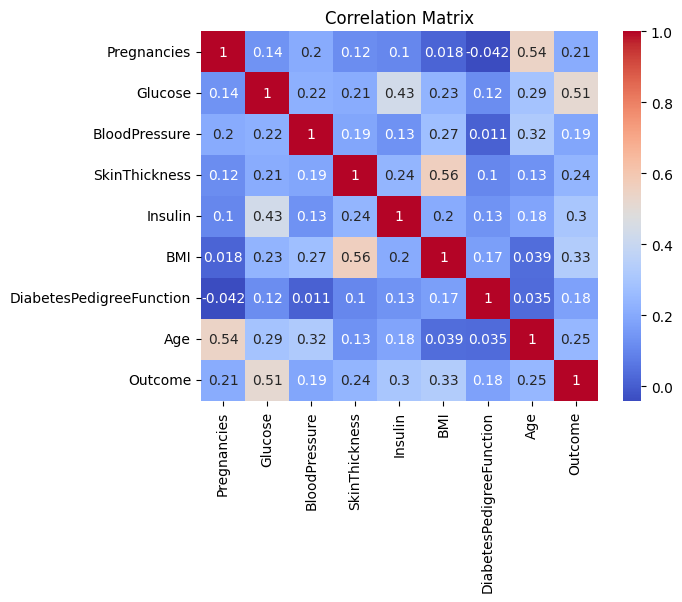

In [45]:
corr_matrix = train_df_processed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Proceed to scale the data
Make sure to only run the cell ONCE, do NOT fit again

In [48]:
# can initialize the scaler from package declared above
scaler = StandardScaler()

# will fit the scaler to the training data (dont want to leak test data) and transform the training data
train_df_scaled = train_df_processed.copy()
train_df_scaled[train_df_scaled.columns.difference(['Outcome'])] = scaler.fit_transform(train_df_scaled[train_df_scaled.columns.difference(['Outcome'])])

# will also transform the test data using the same scaler
test_df_scaled = test_df_processed.copy()
test_df_scaled[test_df_scaled.columns.difference(['Outcome'])] = scaler.transform(test_df_scaled[test_df_scaled.columns.difference(['Outcome'])])


Scaled Training Data:
      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
353    -0.855120 -1.057533      -0.858066      -1.910489 -1.473258 -0.785079   
711     0.360963  0.143389       0.500239      -0.243007 -1.473258 -0.421652   
373    -0.551100 -0.557149      -1.197642       1.491175 -1.473258  0.380916   
46     -0.855120  0.810568      -1.367431       0.023790  0.006507 -0.406509   
682    -1.159141 -0.890739      -0.688278       1.357776 -1.473258  1.849765   
..           ...       ...            ...            ...       ...       ...   
451    -0.551100  0.410260      -0.178914       0.023790  0.006507 -0.527651   
113     0.056942 -1.524559      -0.858066       0.023790  0.006507  0.244631   
556    -0.855120 -0.824021      -0.178914       1.491175  0.006507  0.865485   
667     1.881067 -0.356995      -0.178914      -0.243007  0.006507 -0.739650   
107     0.056942  0.743850      -1.197642      -0.109608  1.116331 -0.436795   

     DiabetesPed

In [52]:
# Display scaled data
train_df_scaled.head()
#test_df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
353,-0.855120,-1.057533,-0.858066,-1.910489,-1.473258,-0.785079,0.393103,-0.798419,0
711,0.360963,0.143389,0.500239,-0.243007,-1.473258,-0.421652,-0.093401,0.572372,0
373,-0.551100,-0.557149,-1.197642,1.491175,-1.473258,0.380916,-0.831784,-0.712745,0
46,-0.855120,0.810568,-1.367431,0.023790,0.006507,-0.406509,0.337897,-0.370047,0
682,-1.159141,-0.890739,-0.688278,1.357776,-1.473258,1.849765,-0.345280,-0.969768,0


# Implement resampling techniques


*   Begin with Cross-Validation



In [62]:
# define the number of splits/folds
num_folds = 10

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# now create logistic regression model
# originally allowed default (100) and 150 iters, but didnt converge. so chose 200
model = LogisticRegression(max_iter=200)

# Perform cross-validation
for train_index, val_index in kf.split(train_df_processed.drop('Outcome', axis=1), train_df_processed['Outcome']):
    X_train, X_val = train_df_processed.iloc[train_index].drop('Outcome', axis=1), train_df_processed.iloc[val_index].drop('Outcome', axis=1)
    y_train, y_val = train_df_processed.iloc[train_index]['Outcome'], train_df_processed.iloc[val_index]['Outcome']

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        40
           1       0.79      0.50      0.61        22

    accuracy                           0.77        62
   macro avg       0.78      0.71      0.73        62
weighted avg       0.78      0.77      0.76        62

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        40
           1       0.75      0.68      0.71        22

    accuracy                           0.81        62
   macro avg       0.79      0.78      0.78        62
weighted avg       0.80      0.81      0.80        62

              precision    recall  f1-score   support

           0       0.81      0.95      0.87        40
           1       0.87      0.59      0.70        22

    accuracy                           0.82        62
   macro avg       0.84      0.77      0.79        62
weighted avg       0.83      0.82      0.81        62

              preci

In [65]:
# Define the model
model = LogisticRegression(max_iter=200)

# Function for K-Fold Cross-Validation with classification report
def k_fold_cross_validation(X, y, num_folds=10):
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_results = []

    # Perform cross-validation
    for train_index, val_index in kf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Train the model
        model.fit(X_train, y_train)

        # Get predictions and classification report
        y_pred = model.predict(X_val)
        report = classification_report(y_val, y_pred, output_dict=True)

        # Store the metrics for analysis
        accuracy = report['accuracy']
        precision_0 = report['0']['precision']
        precision_1 = report['1']['precision']
        recall_0 = report['0']['recall']
        recall_1 = report['1']['recall']
        f1_0 = report['0']['f1-score']
        f1_1 = report['1']['f1-score']

        cv_results.append({
            'Accuracy': accuracy,
            'Precision_0': precision_0,
            'Precision_1': precision_1,
            'Recall_0': recall_0,
            'Recall_1': recall_1,
            'F1_0': f1_0,
            'F1_1': f1_1
        })

    return pd.DataFrame(cv_results)

# Example: Load your data (assuming train_df_processed is already available)
X = train_df_processed.drop('Outcome', axis=1)
y = train_df_processed['Outcome']

# Perform k-fold cross-validation
cv_results_df = k_fold_cross_validation(X, y, num_folds=10)

# Print the results
print("K-Fold Cross-Validation Results:")
print(cv_results_df)

# Optionally, calculate and print mean and standard deviation for each metric
cv_means = cv_results_df.mean()
cv_std = cv_results_df.std()

print("\nK-Fold CV Mean Results:")
print(cv_means)
print("\nK-Fold CV Standard Deviation Results:")
print(cv_std)


K-Fold Cross-Validation Results:
   Accuracy  Precision_0  Precision_1  Recall_0  Recall_1      F1_0      F1_1
0  0.774194     0.770833     0.785714     0.925  0.500000  0.840909  0.611111
1  0.806452     0.833333     0.750000     0.875  0.681818  0.853659  0.714286
2  0.822581     0.808511     0.866667     0.950  0.590909  0.873563  0.702703
3  0.725806     0.794872     0.608696     0.775  0.636364  0.784810  0.622222
4  0.819672     0.808511     0.857143     0.950  0.571429  0.873563  0.685714
5  0.819672     0.808511     0.857143     0.950  0.571429  0.873563  0.685714
6  0.754098     0.790698     0.666667     0.850  0.571429  0.819277  0.615385
7  0.786885     0.800000     0.750000     0.900  0.571429  0.847059  0.648649
8  0.803279     0.833333     0.736842     0.875  0.666667  0.853659  0.700000
9  0.737705     0.785714     0.631579     0.825  0.571429  0.804878  0.600000

K-Fold CV Mean Results:
Accuracy       0.785034
Precision_0    0.803432
Precision_1    0.751045
Recall_0    

Next implement boot sampling

In [72]:


def bootstrap_sampling(X_train, y_train, X_val, y_val, n_samples=1000):
    # Will store bootstrap results to analyze as a whole
    bootstrap_results = []

    # Initialize the model, use 200 again
    model = LogisticRegression(max_iter=200)

    # Will now perform bootstrap sampling
    for i in range(n_samples):
        # Resample with replacement from the training data
        X_resampled, y_resampled = resample(X_train, y_train, random_state=42)

        # Train the model on the resampled data
        model.fit(X_resampled, y_resampled)

        # Evaluate the model
        y_pred = model.predict(X_val)

        # Generate the classification report
        report = classification_report(y_val, y_pred, output_dict=True)

        # Extract key metrics
        accuracy = report['accuracy']
        precision_0 = report['0']['precision']
        precision_1 = report['1']['precision']
        recall_0 = report['0']['recall']
        recall_1 = report['1']['recall']
        f1_0 = report['0']['f1-score']
        f1_1 = report['1']['f1-score']

        # Store results in the list
        bootstrap_results.append({
            'Sample': i,
            'Accuracy': accuracy,
            'Precision_0': precision_0,
            'Precision_1': precision_1,
            'Recall_0': recall_0,
            'Recall_1': recall_1,
            'F1_0': f1_0,
            'F1_1': f1_1
        })

    return pd.DataFrame(bootstrap_results)

# Perform BS
bootstrap_results_df = bootstrap_sampling(X_train, y_train, X_val, y_val, n_samples=1000)

# Optionally, calculate and print mean and standard deviation for each metric
bs_means = bootstrap_results_df.mean()
bs_std = bootstrap_results_df.std()

print("\nBS Mean Results:")
print(bs_means)
print("\nBS Standard Deviation Results:")
print(bs_means)



BS Mean Results:
Sample         499.500000
Accuracy         0.721311
Precision_0      0.780488
Precision_1      0.600000
Recall_0         0.800000
Recall_1         0.571429
F1_0             0.790123
F1_1             0.585366
dtype: float64

BS Standard Deviation Results:
Sample         499.500000
Accuracy         0.721311
Precision_0      0.780488
Precision_1      0.600000
Recall_0         0.800000
Recall_1         0.571429
F1_0             0.790123
F1_1             0.585366
dtype: float64


In [75]:

def smote_resampling(X_train, y_train, X_val, y_val, n_samples=1000):
    # Will store SMOTE results to analyze just like bootstrap and cross validation
    smote_results = []

    # Initialize the model
    model = LogisticRegression(max_iter=200)

    # Initialize SMOTE
    smote = SMOTE(random_state=42)

    # Perform SMOTE resampling
    for i in range(n_samples):
        # Apply SMOTE to the training data
        X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

        # Train the model on the resampled (SMOTE-augmented) data
        model.fit(X_resampled, y_resampled)

        # Evaluate the model on the validation set
        y_pred = model.predict(X_val)

        # Generate the classification report
        report = classification_report(y_val, y_pred, output_dict=True)

        # Extract key metrics
        accuracy = report['accuracy']
        precision_0 = report['0']['precision']
        precision_1 = report['1']['precision']
        recall_0 = report['0']['recall']
        recall_1 = report['1']['recall']
        f1_0 = report['0']['f1-score']
        f1_1 = report['1']['f1-score']

        # Store results in the list
        smote_results.append({
            'Sample': i,
            'Accuracy': accuracy,
            'Precision_0': precision_0,
            'Precision_1': precision_1,
            'Recall_0': recall_0,
            'Recall_1': recall_1,
            'F1_0': f1_0,
            'F1_1': f1_1
        })

    # Convert the results into a DataFrame
    return pd.DataFrame(smote_results)

# Perform SMOTE-based resampling
smote_results_df = smote_resampling(X_train, y_train, X_val, y_val, n_samples=1000)

# Optionally, calculate and print the mean and standard deviation for each metric
smote_means = smote_results_df.mean()
smote_std = smote_results_df.std()

print("\nSMOTE Mean Results:")
print(smote_means)

print("\nSMOTE Standard Deviation Results:")
print(smote_std)



SMOTE Mean Results:
Sample         499.500000
Accuracy         0.672131
Precision_0      0.763158
Precision_1      0.521739
Recall_0         0.725000
Recall_1         0.571429
F1_0             0.743590
F1_1             0.545455
dtype: float64

SMOTE Standard Deviation Results:
Sample         2.888194e+02
Accuracy       8.552995e-15
Precision_0    5.553893e-15
Precision_1    1.232964e-14
Recall_0       1.332934e-14
Recall_1       6.553593e-15
F1_0           1.244072e-14
F1_1           1.999401e-15
dtype: float64


In [ ]:
# Combine results from both methods into one DataFrame
cv_results_list = cv_results_df[['test_accuracy', 'test_precision_macro', 'test_recall_macro']]
cv_results_list['Method'] = 'K-Fold CV'

bootstrap_df['Method'] = 'Bootstrap Sampling'
bootstrap_metrics = bootstrap_df[['Accuracy', 'Precision_0', 'Precision_1', 'Recall_0', 'Recall_1']]

# Concatenate both methods' results
comparison_df = pd.concat([cv_results_list, bootstrap_metrics], axis=0)

# Plot comparison (e.g., accuracy)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Method', y='test_accuracy', data=comparison_df)
plt.title('Comparison of Accuracy: Bootstrap Sampling vs. K-Fold Cross-Validation')
plt.show()